# Project  - Bankruptcy Prevention 

In [1]:
#Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset

bank = pd.read_csv("bankruptcy-prevention.csv", delimiter=";")
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
bank.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [4]:
#Rename the columns

bank = bank.rename(columns={' management_risk':'management_risk', ' financial_flexibility':'financial_flexibility', ' credibility':'credibility', ' competitiveness':'competitiveness', ' operating_risk':'operating_risk', ' class':'class'})

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
#Check for Null values

bank.isna().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [7]:
bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Inference:
    

In [8]:
#Visualization Plot settings

plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 350
plt.rcParams['font.size'] = 16

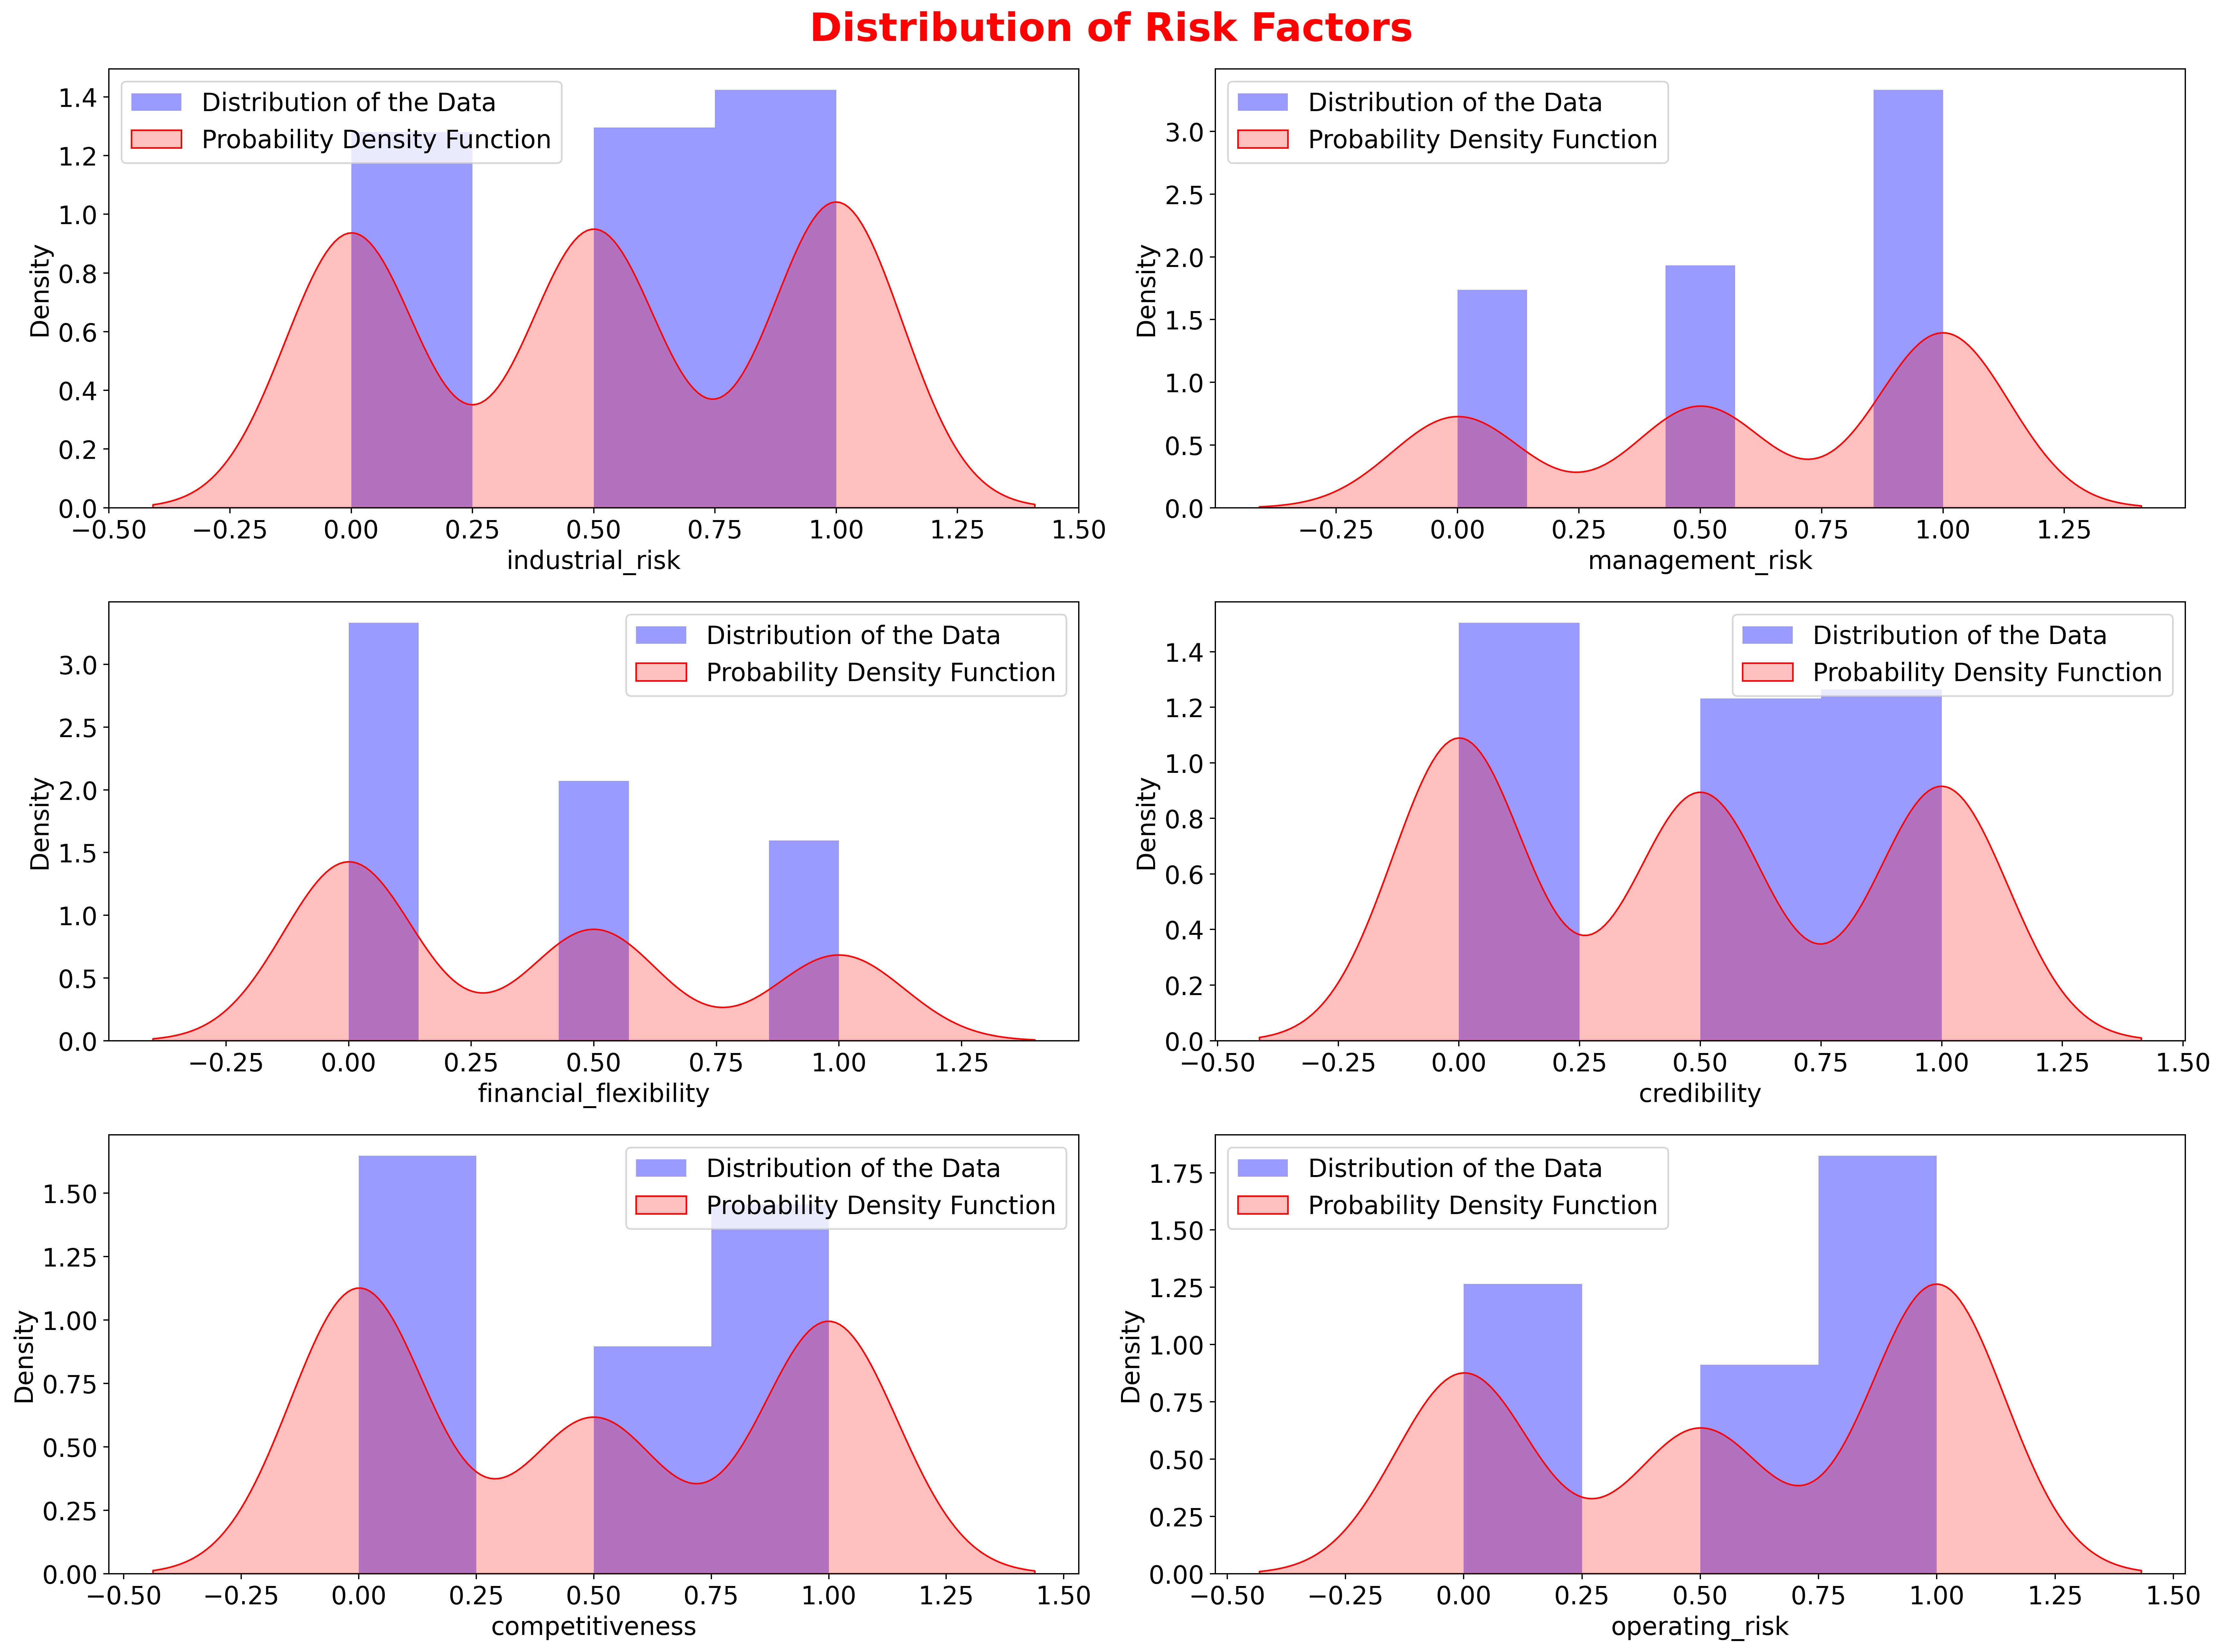

In [9]:
#Distribution plot for each column

fig, ax = plt.subplots(nrows=3, ncols=2)
fig.suptitle('Distribution of Risk Factors', fontsize = 25, fontweight = 'bold', color = 'red')
sns.distplot(bank['industrial_risk'], ax=ax[0,0], kde_kws= {'fill':True, 'color':'red','label':'Probability Density Function'},color= 'blue', label= 'Distribution of the Data')
ax[0,0].legend()
sns.distplot(bank['management_risk'], ax=ax[0,1], kde_kws= {'fill':True, 'color':'red', 'label':'Probability Density Function'}, color= 'blue', label= 'Distribution of the Data')
ax[0,1].legend()
sns.distplot(bank['financial_flexibility'], ax=ax[1,0], kde_kws= {'fill':True, 'color':'red', 'label':'Probability Density Function'},color= 'blue', label= 'Distribution of the Data')
ax[1,0].legend()
sns.distplot(bank['credibility'], ax=ax[1,1], kde_kws= {'fill':True, 'color':'red', 'label':'Probability Density Function'},color= 'blue', label= 'Distribution of the Data')
ax[1,1].legend()
sns.distplot(bank['competitiveness'], ax=ax[2,0], kde_kws= {'fill':True, 'color':'red', 'label':'Probability Density Function'},color= 'blue', label= 'Distribution of the Data')
ax[2,0].legend()
sns.distplot(bank['operating_risk'], ax=ax[2,1], kde_kws= {'fill':True, 'color':'red', 'label':'Probability Density Function'},color= 'blue', label= 'Distribution of the Data')
ax[2,1].legend()
plt.tight_layout()

In [10]:
#Skewness

bank.skew()

industrial_risk         -0.067011
management_risk         -0.444701
financial_flexibility    0.479134
credibility              0.112955
competitiveness          0.093906
operating_risk          -0.275547
dtype: float64

Inference: 

Mean of the Industrial risk, Management risk, Operating risk are greater than median, so it is negatively skewed.

Median of Financial flexibility, credibility, Competitveness are greater than mean, so it is positively skewed.

But overall all the features are near to normal distribution as the distribution of data is not greater than 1 or less than -1

In [11]:
bank.groupby('class').count()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
class,,,,,,
bankruptcy,107,107,107,107,107,107
non-bankruptcy,143,143,143,143,143,143


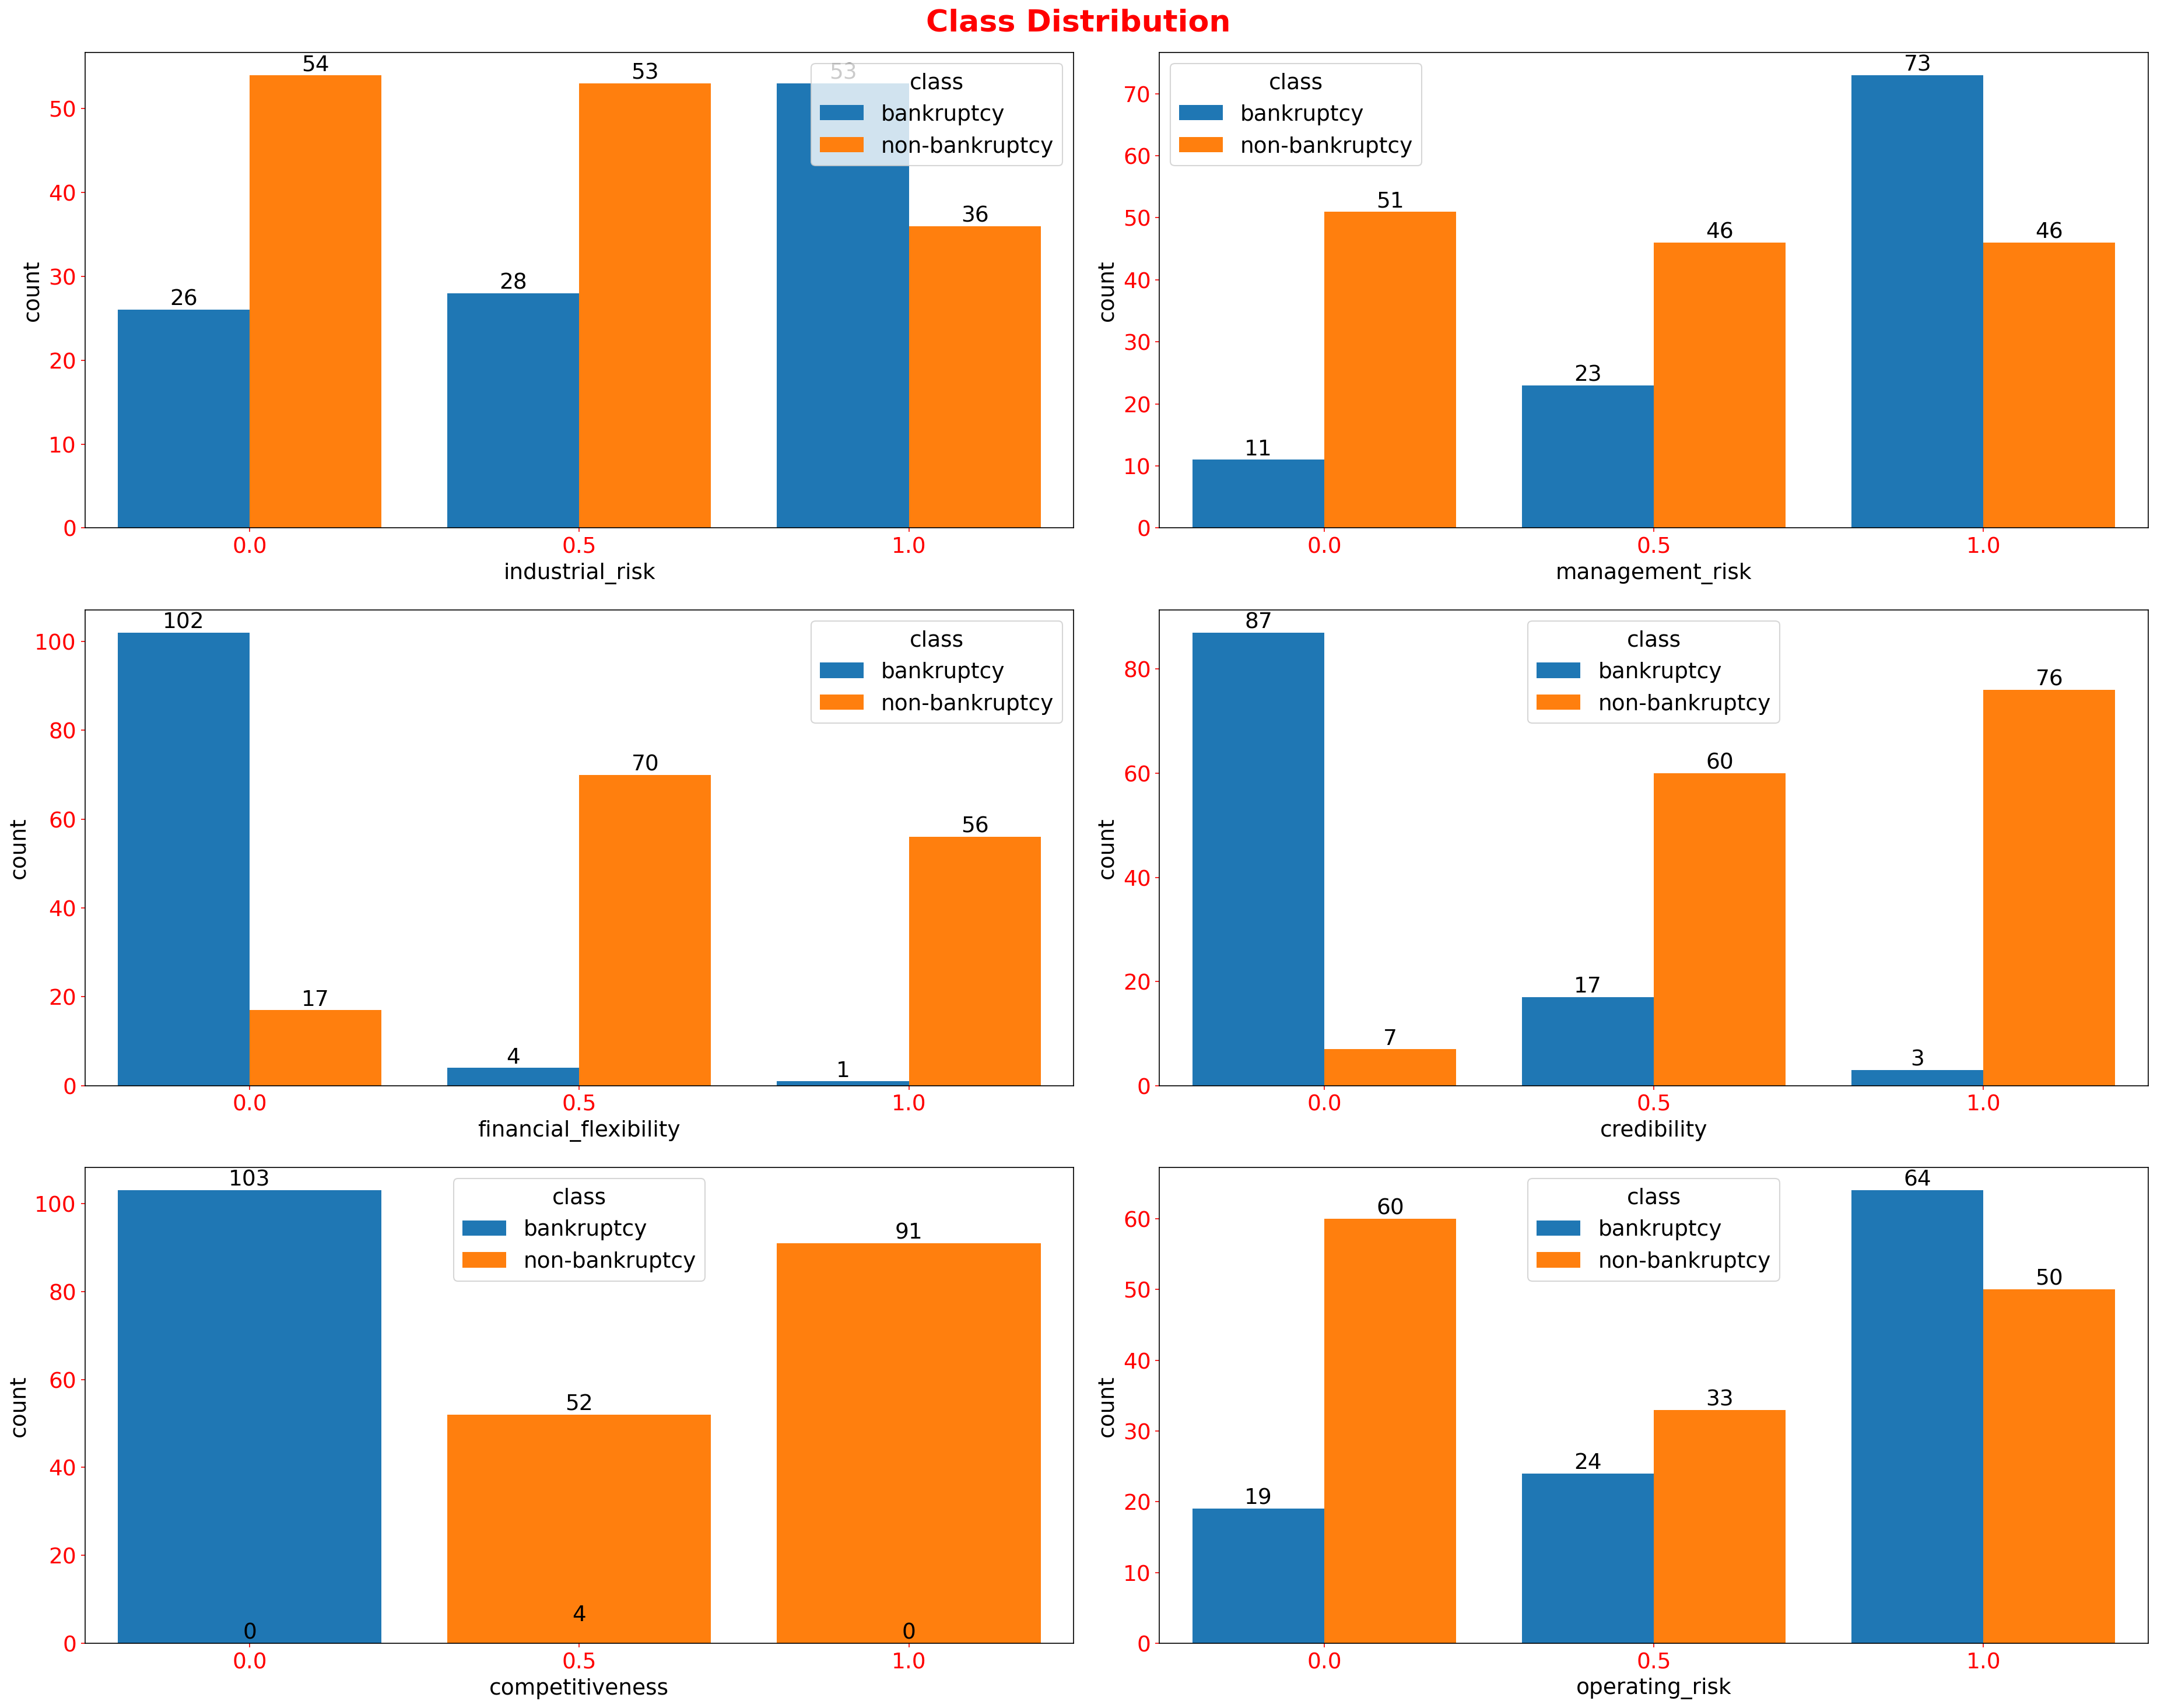

In [88]:
plt.rcParams['figure.figsize'] = (25,20)
plt.rcParams['font.size'] = 18
# plt.rcParams['xtick.labelsize'] = 25
# plt.rcParams['ytick.labelsize'] = 20

#Individual feature Analysis for class using Count plt

fig, ax = plt.subplots(nrows=3, ncols=2)
fig.suptitle('Class Distribution', fontsize = 25, fontweight = 'bold', color = 'red')
sns.countplot(x = 'industrial_risk',data = bank,hue = 'class',saturation=1.2, ax=ax[0,0])
sns.countplot(x = 'management_risk',data = bank,hue = 'class',saturation=1.2, ax=ax[0,1])
sns.countplot(x = 'financial_flexibility',data = bank,hue = 'class',saturation=1.2, ax=ax[1,0])
sns.countplot(x = 'credibility',data = bank,hue = 'class',saturation=1.2, ax=ax[1,1])
sns.countplot(x = 'competitiveness',data = bank,hue = 'class',saturation=1.2, ax=ax[2,0], dodge= False)
sns.countplot(x = 'operating_risk',data = bank,hue = 'class',saturation=1.2, ax=ax[2,1])

for i in range(3):
    for j in range(2):
        for p in ax[i, j].patches:
            ax[i, j].text(p.get_x() + p.get_width() / 2, p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')

plt.tight_layout()

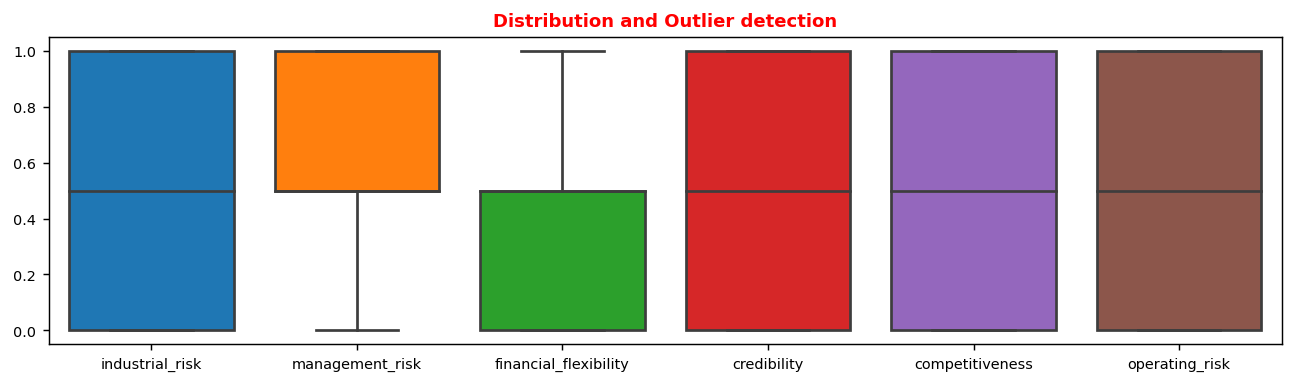

In [13]:
#Boxplot for the distribution of the data and outlier detection

plt.rcParams['figure.figsize'] = (10,3)
plt.rcParams['figure.dpi'] = 130
plt.rcParams['font.size'] = 8
plt.title('Distribution and Outlier detection', fontsize = 10, fontweight = 'bold', color = 'red')
sns.boxplot(data=bank,saturation=1.2)
plt.tight_layout()

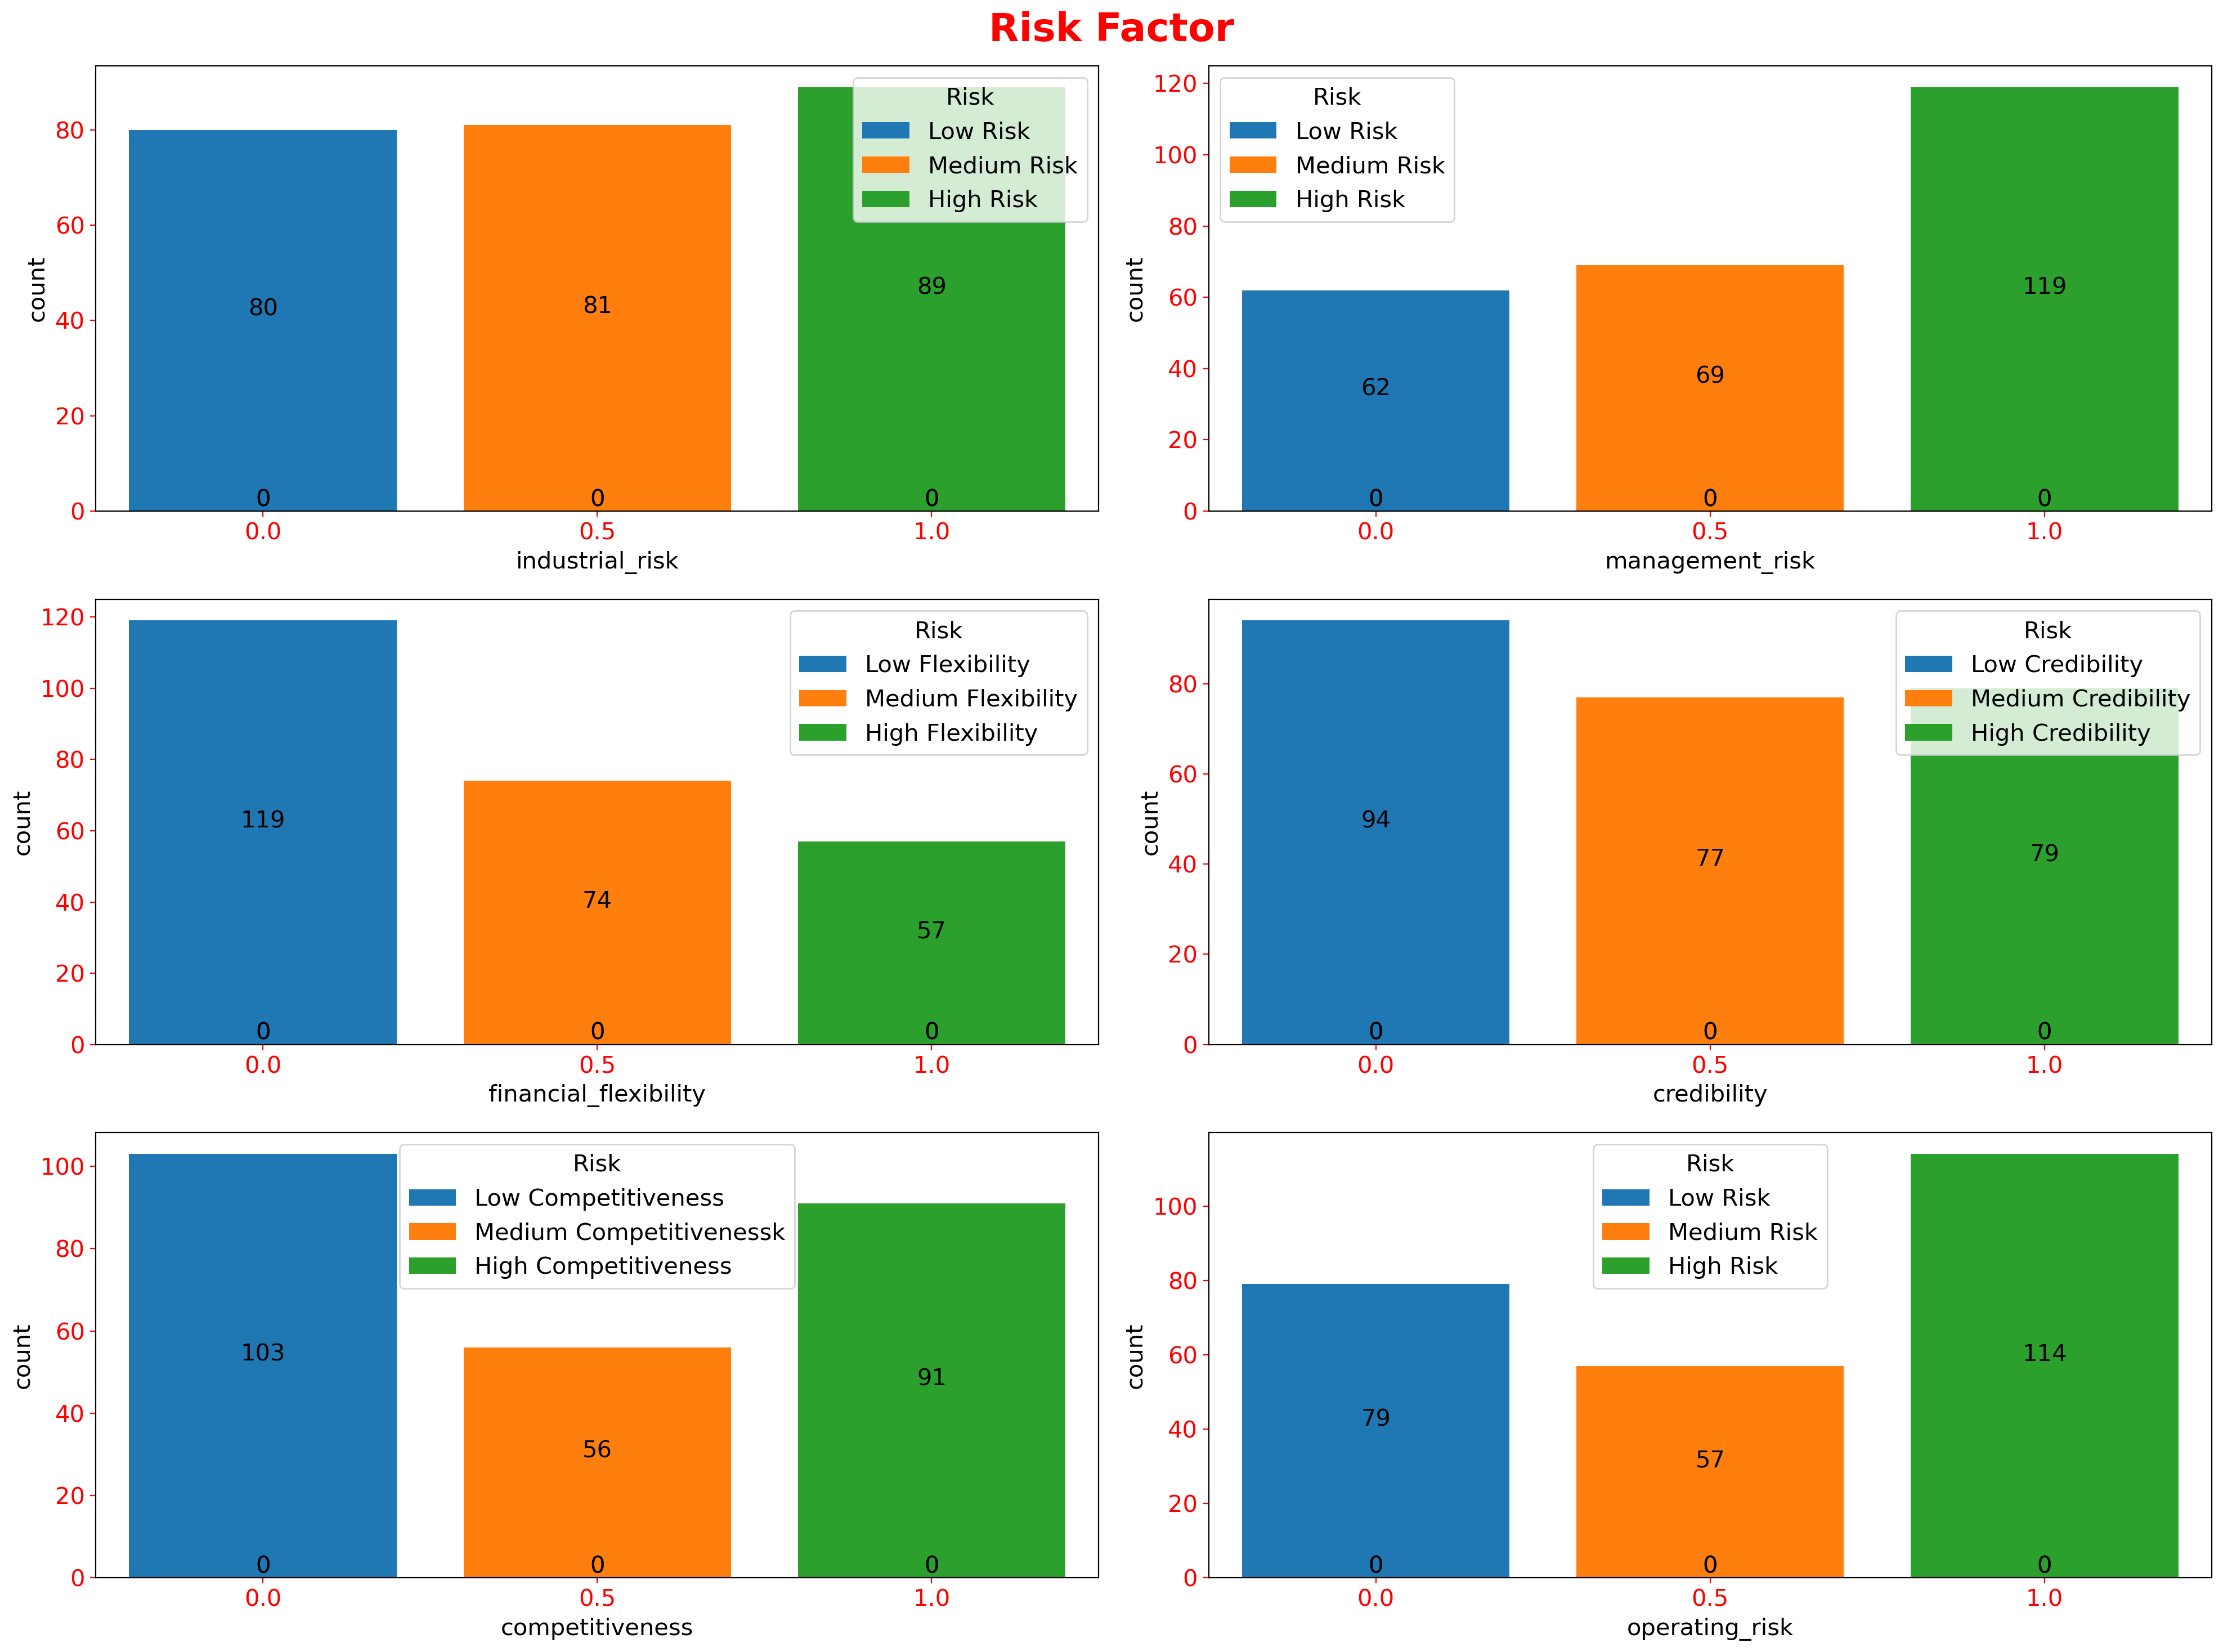

In [93]:
#Risk factor for each features

plt.rcParams['font.size'] = 15
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots(3,2, figsize = (20,15))
fig.suptitle('Risk Factor', fontsize = 25, fontweight = 'bold', color = 'red')
sns.countplot(x = 'industrial_risk',data = bank, hue= 'industrial_risk',saturation=1.2,ax=ax[0,0], dodge= False)
ax[0,0].legend(title = 'Risk',labels=['Low Risk','Medium Risk', 'High Risk'])
sns.countplot(x = 'management_risk',data = bank,hue= 'management_risk',saturation=1.2,ax=ax[0,1], dodge= False)
ax[0,1].legend(title = 'Risk',labels=['Low Risk','Medium Risk', 'High Risk'])
sns.countplot(x = 'financial_flexibility',data = bank,hue= 'financial_flexibility',saturation=1.2,ax=ax[1,0], dodge= False)
ax[1,0].legend(title = 'Risk',labels=['Low Flexibility','Medium Flexibility', 'High Flexibility'])
sns.countplot(x = 'credibility',data = bank,hue= 'credibility',saturation=1.2,ax=ax[1,1], dodge= False)
ax[1,1].legend(title = 'Risk',labels=['Low Credibility','Medium Credibility', 'High Credibility'])
sns.countplot(x = 'competitiveness',data = bank,hue= 'competitiveness',saturation=1.2,ax=ax[2,0], dodge= False)
ax[2,0].legend(title = 'Risk',labels=['Low Competitiveness','Medium Competitivenessk', 'High Competitiveness'])
sns.countplot(x = 'operating_risk',data = bank,hue= 'operating_risk',saturation=1.2,ax=ax[2,1], dodge= False)
ax[2,1].legend(title = 'Risk', labels=['Low Risk','Medium Risk', 'High Risk'])

for i in range(3):
    for j in range(2):
        for p in ax[i, j].patches:
            ax[i, j].text(p.get_x() + p.get_width() / 2, p.get_height() / 2, int(p.get_height()),ha='center', va='bottom')

plt.tight_layout()

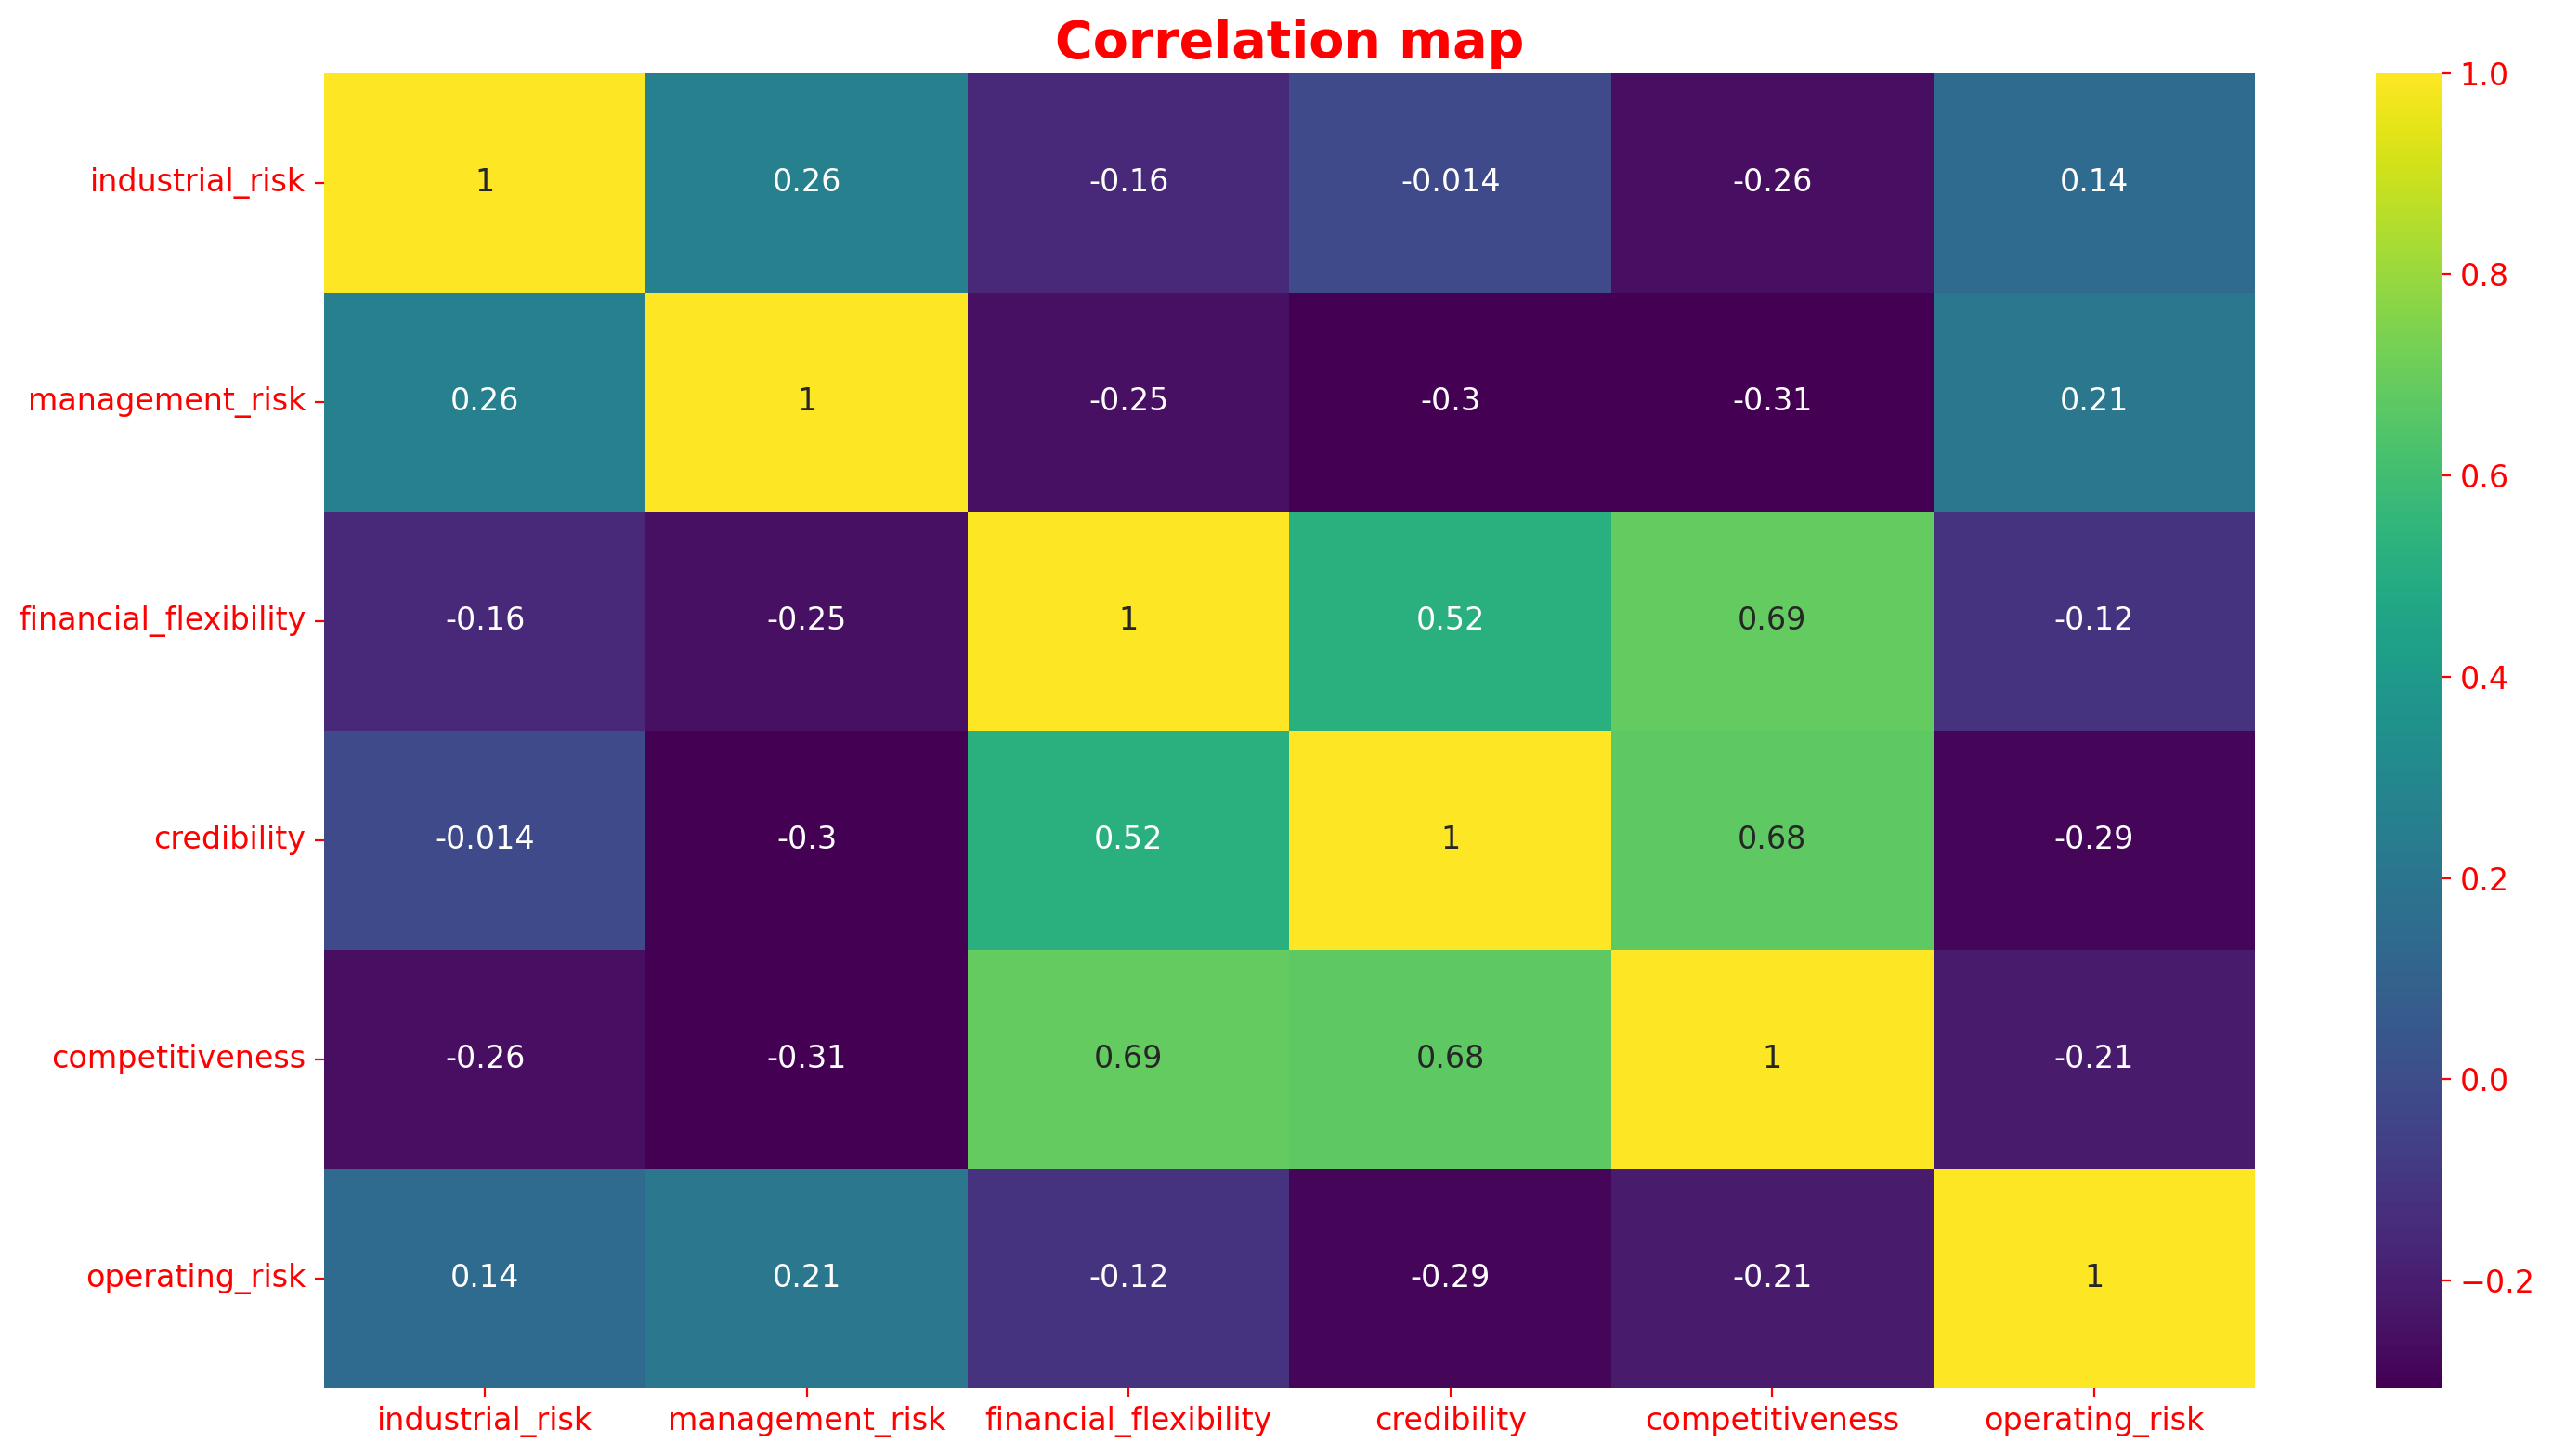

In [15]:
#Correlation between the features

plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.color'] = 'red'
sns.heatmap(bank.corr(),annot=True, cmap = 'viridis')
plt.title('Correlation map', color = 'red', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

In [16]:
#Defining independent features(X) and dependent feature(y)

X = bank.iloc[:,:6]
y = bank['class']

In [17]:
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [18]:
y

0          bankruptcy
1          bankruptcy
2          bankruptcy
3          bankruptcy
4          bankruptcy
            ...      
245    non-bankruptcy
246    non-bankruptcy
247    non-bankruptcy
248    non-bankruptcy
249    non-bankruptcy
Name: class, Length: 250, dtype: object

In [19]:
#Splitting the data into training and testing

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state= 0)

In [20]:
Xtrain

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
71,1.0,1.0,0.0,0.0,0.0,1.0
160,0.5,1.0,0.5,0.5,1.0,0.5
180,0.0,0.0,0.5,0.5,1.0,1.0
75,1.0,1.0,0.0,0.0,0.0,0.5
59,1.0,1.0,0.0,0.5,0.0,0.0
...,...,...,...,...,...,...
67,1.0,1.0,0.0,0.5,0.0,1.0
192,0.5,1.0,0.0,0.0,1.0,0.0
117,0.0,0.0,1.0,1.0,0.5,0.0
47,1.0,1.0,0.0,0.0,0.0,1.0


In [21]:
Xtest.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
225,0.0,0.0,1.0,1.0,0.5,0.0
122,1.0,1.0,0.5,1.0,0.5,1.0
92,0.5,1.0,0.0,0.0,0.0,0.5
157,0.0,0.5,1.0,0.5,1.0,1.0
154,0.5,0.0,1.0,1.0,1.0,1.0


In [22]:
ytrain

71         bankruptcy
160    non-bankruptcy
180    non-bankruptcy
75         bankruptcy
59         bankruptcy
            ...      
67         bankruptcy
192    non-bankruptcy
117    non-bankruptcy
47         bankruptcy
172    non-bankruptcy
Name: class, Length: 200, dtype: object

In [23]:
ytest.head()

225    non-bankruptcy
122    non-bankruptcy
92         bankruptcy
157    non-bankruptcy
154    non-bankruptcy
Name: class, dtype: object

# Model building using Logistic Regression

In [24]:
lg = LogisticRegression()

In [25]:
#Fitting the model into training data and testing data

lg.fit(Xtrain, ytrain)

LogisticRegression()

In [26]:
#Predict the model

ypred = lg.predict(Xtest)
ypred

array(['non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy'], dtype=object)

In [27]:
#Accuracy of the model

print(classification_report(ytest, ypred))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        18
non-bankruptcy       1.00      1.00      1.00        32

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



Inference:
    
    The model predicted all the classes correctly

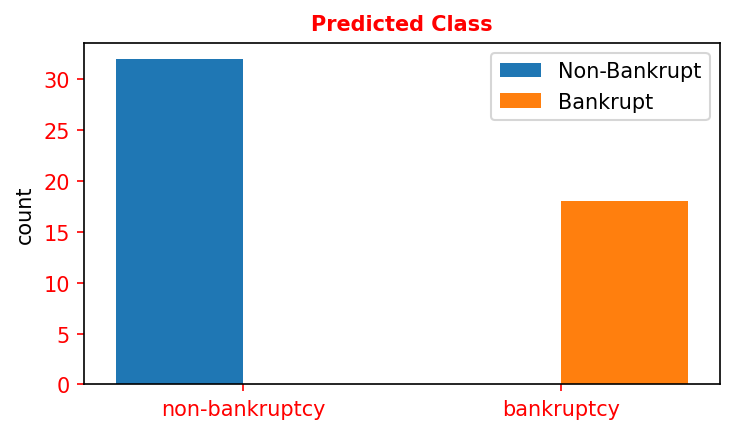

In [28]:
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 150

plt.title('Predicted Class', fontsize = 10, fontweight = 'bold', color = 'red')
sns.countplot(x = ypred,hue= ypred, saturation=1.2)
plt.legend(labels=['Non-Bankrupt','Bankrupt'])

plt.tight_layout()

In [29]:
confusion_matrix(ytest, ypred)

array([[18,  0],
       [ 0, 32]], dtype=int64)

Inference:
    
    18 represents the number of True Positive and correctly classified into bankruptcy class
    0 represents the number of False Positive (no classes are incorrectly classified)
    0 represents the number of False Negative (no classes are incorrectly classified)
    32 represents the number of True Negative and correctly classified into non-bankruptcy class 

<AxesSubplot:>

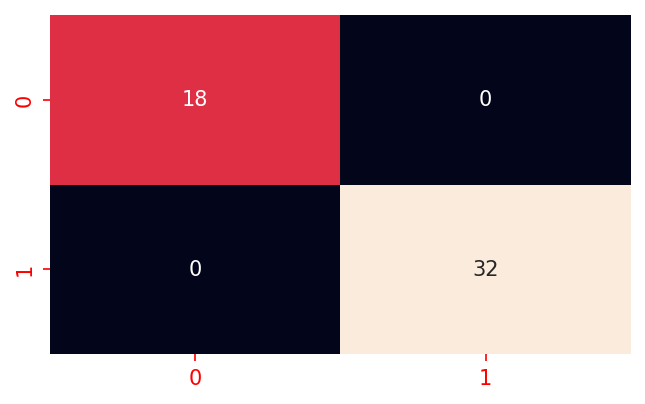

In [30]:
sns.heatmap(confusion_matrix(ytest, ypred),annot= True, cbar= False)

In [31]:
#Encode the target variable

le = LabelEncoder()

ytest_enc = le.fit_transform(ytest)

In [32]:
proba = lg.predict_proba(Xtest)[:,1]

In [33]:
proba

array([0.99078349, 0.84930061, 0.03675663, 0.98904095, 0.99707997,
       0.96264825, 0.99298518, 0.0531501 , 0.0531501 , 0.87243526,
       0.99858175, 0.91843493, 0.63224494, 0.88020845, 0.98443996,
       0.03661442, 0.96495011, 0.93856358, 0.99511137, 0.02304272,
       0.99412468, 0.03661442, 0.9638869 , 0.99208314, 0.99049109,
       0.02304272, 0.1115806 , 0.0897034 , 0.5785454 , 0.02304272,
       0.98865491, 0.04202287, 0.99858175, 0.96495011, 0.99377772,
       0.99629625, 0.97842588, 0.0897034 , 0.03661442, 0.98869996,
       0.99536578, 0.02906987, 0.9061882 , 0.96495011, 0.02906987,
       0.0897034 , 0.97045565, 0.07413664, 0.02918366, 0.99322488])

In [34]:
auc = roc_auc_score(ytest_enc, proba)

In [35]:
roc_curve(y_true=ytest_enc, y_score=proba)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05555556, 0.22222222, 0.27777778, 0.38888889, 0.5       ,
        0.66666667, 0.72222222, 0.83333333, 1.        ]),
 array([0.     , 0.0625 , 0.59375, 0.6875 , 1.     , 1.     , 1.     ,
        1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ]),
 array([1.99858175, 0.99858175, 0.97045565, 0.96495011, 0.5785454 ,
        0.1115806 , 0.0897034 , 0.07413664, 0.0531501 , 0.03675663,
        0.03661442, 0.02918366, 0.02906987, 0.02304272]))

In [36]:
fpr, tpr, threshold = roc_curve(ytest_enc, proba)

In [37]:
threshold

array([1.99858175, 0.99858175, 0.97045565, 0.96495011, 0.5785454 ,
       0.1115806 , 0.0897034 , 0.07413664, 0.0531501 , 0.03675663,
       0.03661442, 0.02918366, 0.02906987, 0.02304272])

In [38]:
pd.DataFrame({'False Positive Rate': fpr,
             'True Positive Rate': tpr,
             'Threshold': threshold})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.00000,1.998582
1,0.000000,0.06250,0.998582
2,0.000000,0.59375,0.970456
3,0.000000,0.68750,0.964950
4,0.000000,1.00000,0.578545
5,0.055556,1.00000,0.111581
6,0.222222,1.00000,0.089703
7,0.277778,1.00000,0.074137
8,0.388889,1.00000,0.053150
9,0.500000,1.00000,0.036757


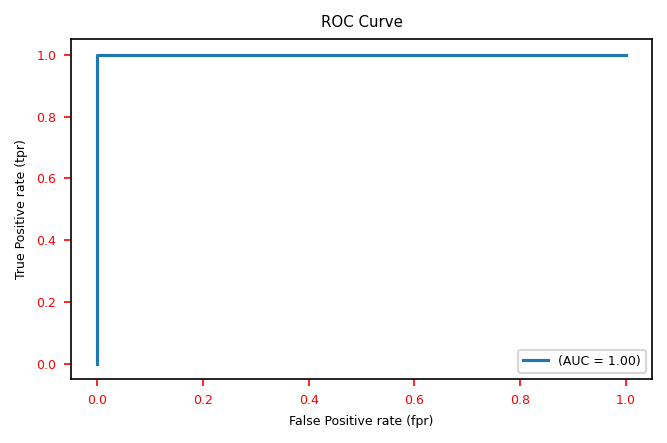

In [39]:
#ROC Curve

plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 6
plt.plot(fpr, tpr, label = '(AUC = %0.2f)' %auc)
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')
plt.title('ROC Curve')
plt.legend()

# Model Building Using Decision Tree

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [41]:
#Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state= 1)

In [42]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dt

DecisionTreeClassifier(criterion='entropy')

In [43]:
dt.fit(X_train, y_train)

ypred_dt = dt.predict(X_test)

ypred_dt

array(['bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'bankruptcy'], dtype=object)

In [44]:
print(classification_report(y_test, ypred_dt))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        24
non-bankruptcy       1.00      1.00      1.00        26

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



In [45]:
print('Training Accuracy: ', dt.score(Xtrain, ytrain))
print('Testing Accuracy:  ', dt.score(Xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:   1.0


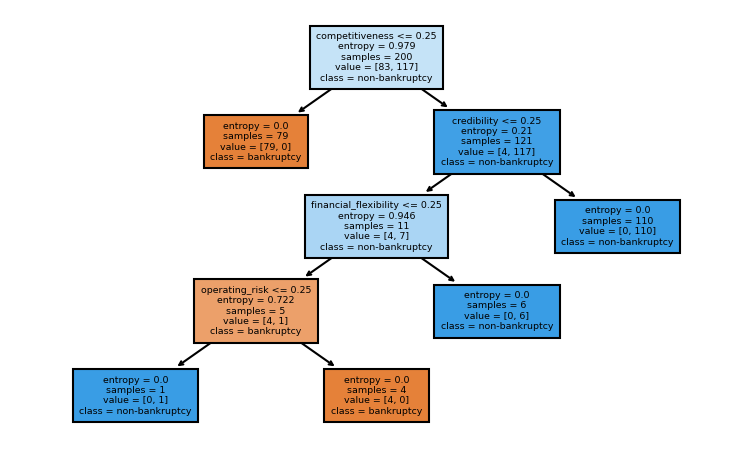

In [46]:
tree.plot_tree(dt, feature_names= X.columns, class_names= bank['class'].unique(), filled= True)
plt.tight_layout()
plt.show()

In [47]:
dt.feature_importances_

array([0.        , 0.        , 0.03468982, 0.07633672, 0.87053909,
       0.01843438])

In [48]:
#Using Criterion Gini

dt_gini = DecisionTreeClassifier(criterion= 'gini')
dt_gini.fit(X_train, y_train)
ypred_dtg = dt_gini.predict(X_test)

In [49]:
print(classification_report(y_test, ypred_dtg))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        24
non-bankruptcy       1.00      1.00      1.00        26

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



In [50]:
print('Training Accuracy: ', dt_gini.score(X_train, y_train))
print('Testing Accuracy:  ', dt_gini.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:   1.0


In [51]:
pd.DataFrame({'Actual':y_test, 'Predicted': ypred_dtg})

,Actual,Predicted
67,bankruptcy,bankruptcy
249,non-bankruptcy,non-bankruptcy
230,non-bankruptcy,non-bankruptcy
161,non-bankruptcy,non-bankruptcy
91,bankruptcy,bankruptcy
224,non-bankruptcy,non-bankruptcy
58,bankruptcy,bankruptcy
234,non-bankruptcy,non-bankruptcy
180,non-bankruptcy,non-bankruptcy
4,bankruptcy,bankruptcy


# Model Building using KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [53]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [54]:
ypred_knn = knn.predict(Xtest)
ypred_knn

array(['non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy'], dtype=object)

In [55]:
knn.score(Xtrain,ytrain),knn.score(Xtest,ytest)

(1.0, 1.0)

In [56]:
trainac = []
testac = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    trainac.append(knn.score(Xtrain,ytrain))
    testac.append(knn.score(Xtest,ytest))

In [57]:
trainac

[1.0,
 1.0,
 0.995,
 0.995,
 0.995,
 0.99,
 0.99,
 0.98,
 0.985,
 0.985,
 0.985,
 0.985,
 0.995,
 0.985,
 0.985,
 0.985,
 0.995,
 0.995,
 0.995,
 0.985,
 0.995,
 0.985,
 0.985,
 0.985]

In [58]:
testac

[1.0,
 1.0,
 1.0,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 1.0,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 1.0,
 0.98]

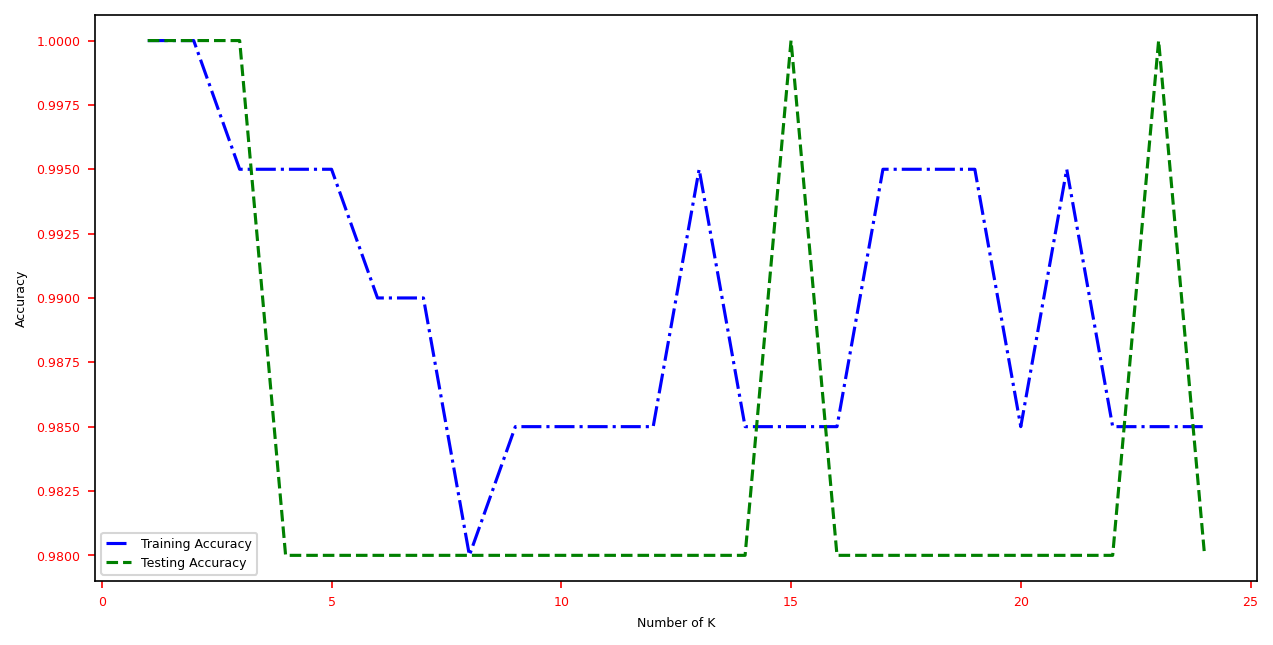

In [59]:
plt.rcParams['figure.figsize'] = (10,5)

plt.plot(range(1,25), trainac,linestyle = '-.', color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,25),testac, linestyle = '--', color = 'green', label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()

In [60]:
n_neighbors = list(range(1,25))
parameters = {'n_neighbors' : n_neighbors}

In [61]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]})

In [62]:
print(grid.best_score_)
print(grid.best_params_)

0.9960000000000001
{'n_neighbors': 1}


In [63]:
kfold = KFold(n_splits = 10)

In [64]:
k_range = range(1, 25)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=kfold)
    k_scores.append(scores.mean())

In [65]:
k_scores

[0.9960000000000001,
 0.9960000000000001,
 0.9960000000000001,
 0.984,
 0.984,
 0.9800000000000001,
 0.984,
 0.9800000000000001,
 0.9879999999999999,
 0.9879999999999999,
 0.984,
 0.9800000000000001,
 0.984,
 0.9800000000000001,
 0.984,
 0.9800000000000001,
 0.984,
 0.9760000000000002,
 0.9800000000000001,
 0.9719999999999999,
 0.9760000000000002,
 0.9720000000000001,
 0.9760000000000002,
 0.9760000000000002]

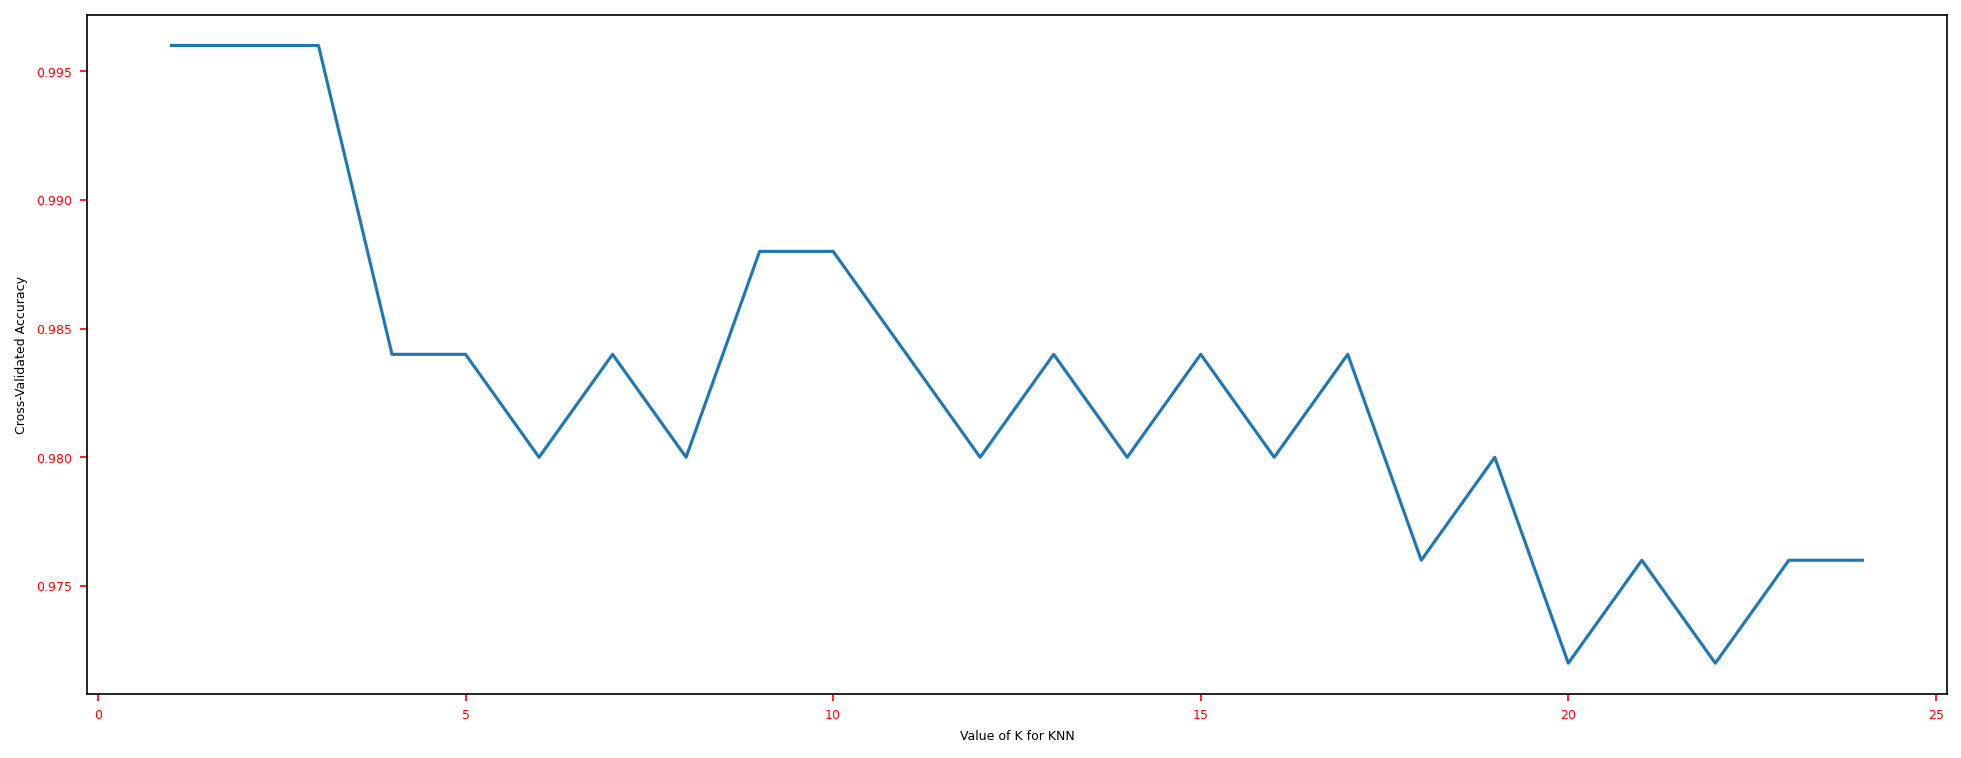

In [66]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [67]:
accuracy = pd.DataFrame({'Value of k' : range(1,25),
                            'Accuracy' : k_scores})
accuracy

,Value of k,Accuracy
0,1,0.996
1,2,0.996
2,3,0.996
3,4,0.984
4,5,0.984
5,6,0.980
6,7,0.984
7,8,0.980
8,9,0.988
9,10,0.988


# Model Building Using SVM 

In [68]:
from sklearn.svm import SVC

In [69]:
clf = SVC()

#kernel: 'poly', 'linear', 'sigmoid'
parameters = {'kernel':['rbf','sigmoid'],
               'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv = 10)

gsv.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
                         'kernel': ['rbf', 'sigmoid']})

In [70]:
gsv.best_params_

{'C': 50, 'gamma': 0.5, 'kernel': 'rbf'}

In [71]:
gsv.best_score_

0.9949999999999999

In [72]:
rsv = RandomizedSearchCV(clf, param_distributions = parameters, cv=10, verbose = 3)
rsv.fit(Xtrain,ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ......C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10] END ......C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/10] END ......C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10] END ......C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10] END ......C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END ......C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 7/10] END ......C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 8/10] END ......C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10] END ......C=6, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 10/10] END .....C=6, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/10] END .C=0.1, gamma=0.5, kernel=sigmoid;, score=0.900 total time=   0.0s
[CV 2/10] END .C=0.1, gamma=0.5, kernel=sigmoi

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [50, 15, 10, 6, 5, 0.1, 0.001,
                                              0.0001],
                                        'gamma': [100, 50, 5, 0.5, 0.1, 0.01,
                                                  0.0001, 'auto'],
                                        'kernel': ['rbf', 'sigmoid']},
                   verbose=3)

In [73]:
rsv.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 6}

In [74]:
rsv.best_score_

0.9949999999999999

In [75]:
svc_model = SVC(C = 50, gamma = 0.01)
svc_model.fit(Xtrain , ytrain)

SVC(C=50, gamma=0.01)

In [76]:
ypred_svc = svc_model.predict(Xtest)
ypred_svc

array(['non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy'], dtype=object)

In [77]:
print(classification_report(ytest, ypred_svc))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        18
non-bankruptcy       1.00      1.00      1.00        32

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



# Model Building Using Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Deployment

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
from sklearn import set_config

set_config(display='diagram')

In [81]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse=False, handle_unknown='ignore'),[6])],remainder='passthrough')

In [82]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 [6])])

In [83]:
bank.head(1)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy


In [84]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2,random_state=1)

In [85]:
dep_model = Pipeline(steps=[('transformer', transformer),('model',GradientBoostingRegressor())])

In [86]:
dep_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [6])])),
                ('model', GradientBoostingRegressor())])

In [87]:
dep_model.fit(xtrain,ytrain)

ValueError: all features must be in [0, 5] or [-6, 0]